# K Nearest Neighbour

   KNN is an instance based non-parameteric learning, that is it does not require any parameter to learn and it is based on the instances(train data). It is a lazy learner and time for training increases with increase in data.
   K Nearest algorithm makes classification/prediction based on the k neighbors. 
   
   * In a classification problem, a point will be categorized as the category to which most of the k neighbors belong. 
   * In a regression problem a point will be predicted as the average of the k neighbors.
    
   In addition to classification and regression, knn is also used for outlier identification. 

Points to note:
   * The standardization makes every features to be normally distributed. The neighbors are more dependent on the scale in which you represent the features. In a feature space if not standardized the feature which has very little range will influence our predictions. 
   
   * When there are large number of features, the feature space will be sparse and a lot of computation will be needed in calculating the distance. So its better to reduce the dimension to make the poblem simple. 
   
   
# KNN Classification:
    Here we will classify the iris dataset based on k-nearest neighbors. Iris dataset consists of 150 instances of data with four feature 'Sepal Length','Sepal Width','Pedal Length' and 'Pedal Width' categorized as one of the three species of Iris.
  

In [159]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [27]:
iris = load_iris()
X,y = iris.data,iris.target
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [26]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Preprocessing:

  We need split the iris dataset in a stratified way. This because the distribution of the target variable in the train and test set will be different when using 'train_test_split'. You can refer here for more on [StratifiedShuffleSplit](https://www.kaggle.com/viswanathanc/stratifiedshufflesplit-working-with-less-data) 
  
  We will have to standardize the data since they are not of same range and we do not perform dimensionality reduction as the number of features is only four.

In [62]:
#Stratified Sheffle Split

splitter=StratifiedShuffleSplit(n_splits=1,random_state=12) #we can make a number of combinations of split
#But we are interested in only one.

for train,test in splitter.split(X,y):     #this will splits the index
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]
    y_test = y[test]
    
print("Number of train samples in the three categories:",np.unique(y_train,return_counts=True)[1])
print("Number of test samples in the three categories:",np.unique(y_test,return_counts=True)[1])  

Number of train samples in the three categories: [45 45 45]
Number of test samples in the three categories: [5 5 5]


Text(0.5, 0.98, 'Petal Length Vs Petal Width for the train data')

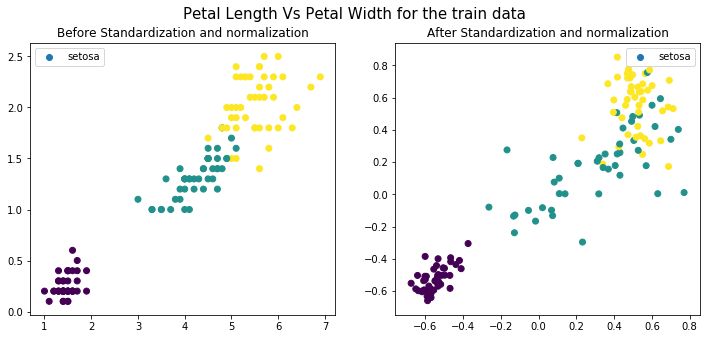

In [63]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.scatter(X_train[:,2],X_train[:,3],c=y_train)
plt.title("Before Standardization and normalization")
plt.legend(labels=iris.target_names)

# Standardization
standardizer = StandardScaler()
X_train = standardizer.fit_transform(X_train)
X_test = standardizer.transform(X_test)

#Normalization
normalizer = Normalizer()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

plt.subplot(122)
plt.scatter(X_train[:,2],X_train[:,3],c=y_train)
plt.title("After Standardization and normalization")
plt.legend(labels=iris.target_names)

plt.suptitle("Petal Length Vs Petal Width for the train data", fontsize=15)

# Find the distance:

The first step would be finding the distances between the test data and the training data. Here we will choose 'Euclidean distance' and discuss about the Distance Metrics later.  

In [78]:
#euclidean distance
def dist(pt1,pt2):
    return np.linalg.norm(pt1-pt2)

d1 = dist(X_test[0,:],X_train[0,:])
print("Euclidean Distance between first value in test and first value in train is:",d1)

Euclidean Distance between first value in test and first value in train is: 0.1458144195228508


In [124]:
#Distance of all points in train data from the test pt
def nearest_train_pts(test_pt):
    i=0
    test_dist=np.empty((len(X_train),2))
    for row in X_train:
        test_dist[i] = i,dist(test_pt,row)
        i=i+1
    indx_nearest_tr_pts = test_dist[:,1].argsort() # sorting based on distance
    return indx_nearest_tr_pts

nearest_train_pts(X_test[0,:])

array([103,  12,   0, 122, 113, 106,  63,  67,  89, 127,   1,  13,  62,
        79,   6,  21,  58, 100,  30,  59, 134, 121,   2, 111,  39, 126,
       109, 123,  64, 132, 118,  87,  26,  31, 110,  69,  85,  41,  43,
        90,  65,  32, 129,  83,  19, 125,  38,  98, 114,  11,  50, 116,
         7,  71,  57,  95,   9,  54,  66, 105,  37,  44,  18, 119,  34,
         5,  10,  94,  86,  84,  22,  97,  52,  28,  82,  25, 112,  47,
        78,  53,  96, 108,  42,  76, 120, 130,  48,  73,  14, 124,  93,
        77,  88,  91,  36,   3,  29, 133,  55,  24,  17,  92,  75, 107,
        72,  23,  16,  81,   4,  35, 102,  61,  68,  40,  51,  46, 104,
        70, 101,  56,  20,  15,  99,  33, 131,   8,  27,  49,  80,  45,
        60, 117, 115, 128,  74])

These are the indices of the closest train points to the test point in ascending order of the distance.

# Step 2:

The Second step is to find the k neighbours. Lets assume k to be 3, we can see how to find the value of 'k' later.

In [172]:
def predict_knn(test,k):
    """This will return the indices of three closest data points """
    i=0
    kneighbors = np.empty((len(test),k))
    for row in test:
        kneighbors[i,:] = nearest_train_pts(row)[:k] # 3 closest neighbors
        i=i+1
    return kneighbors.astype('int')

y_pred_indx = predict_knn(X_test,3)
y_pred_indx

array([[103,  12,   0],
       [133,  46, 101],
       [103,  63,   0],
       [115,  60, 117],
       [ 28, 120,  52],
       [133, 108, 101],
       [ 78,  91,  96],
       [128, 117, 115],
       [ 94, 105,  66],
       [ 61,   4,  20],
       [100, 113, 121],
       [  6,  79,  30],
       [ 42, 112,  97],
       [113, 106, 100],
       [ 61,   4,  74]])

Here we have found the k nearest neighbours for all points in the test data!

# Step 3:

The third step is to predict the result. The most repeated category in the k neighbors is chosen to be the category for the test set.

In [173]:
y_train[y_pred_indx]

array([[0, 0, 0],
       [2, 2, 2],
       [0, 0, 0],
       [1, 2, 2],
       [1, 1, 2],
       [2, 2, 2],
       [1, 2, 2],
       [2, 2, 1],
       [1, 1, 1],
       [1, 1, 2],
       [0, 0, 0],
       [0, 0, 0],
       [2, 2, 2],
       [0, 0, 0],
       [1, 1, 2]])

  These are the species of the three nearest instances in the feature space for the train data. We will construct a function to get the prediction from the indices of the k nearest neighbors and evaluate the accuracy.

In [174]:
def pred_cat(ind):
    """Predicts the Category given the indices of the training dataset"""
    i=0
    prediction = np.empty(len(ind))
    for row in y_train[y_pred_indx]:
        y_pred[i]=np.argmax(row)
        i=i+1
    return prediction

y_pred = pred_cat(y_pred_indx)
y_pred

array([0., 2., 0., 2., 1., 1., 2., 2., 1., 1., 0., 0., 2., 0., 1.])

In [175]:
# Evaluation

accuracy_score(y_test,y_pred)

1.0

    We have now constructed a KNN algorithm from Scratch and got a 100% accuracy! Complete code in script form is available in the repository. Now we will use sklearn's 'KNeighborClassifier' to predict the category.

# KNN in sklearn

In [176]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred_sk = knn.predict(X_test)
accuracy_score(y_pred_sk,y_test)

0.9333333333333333

 This is a three line implementation of knn in sklearn.

# Tuning KNN

* **k neighbors:**
 The number of nearest neighbors to consider for predicting. This is a hyperparameter and can be determined on One-Out-Cross validation. However as the size of the data increases it takes more time to cross validate.


* **Distance metrics:**
 We can set the distance metrics as 'Manhattan'(l1),'Euclidean'(l2) or 'Minkowski'(lp). 
 
 
* **Weightage:**
Weightage can be given based on how close the training point is to our test point. In sklearn default weightage is uniform for all data. For distance metrics 'distance' will give a weightage of 1/distance while training. When data has more noise, having weightage based on instance will help in smoothening out the result.


* **Algorithm:**
Algorithms to calculate the nearest may be 'brute force' (like the one used above). But this approach takes a long time as it have to calculate the distance of every train point from every test point. This is computationally heavy and so tree based datastructures like 'kd-tree' or 'Ball-tree' are also used. 

# Problems in KNN

* Features are given equal weightage in K nearest neighbors. But not at all time every features have same influence on the target variable. This can be overcome by giving weightage to the features based on the relevance. The relevance can be found by cross validation.

* As the dataset become huge, the computation time becomes very long. So it cannot be used with huge datasets.

* Since it is a non-parametric estimate, we cannot use a transfer it widely.

# References:

https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

https://scikit-learn.org/stable/modules/neighbors.html

Chapter 8, Instance-based-Learning, Machine Learning by Tom M.Mitchell.
